# Machine Learning Part 2
## Text Analysis
In this part, we use machine learning to get the most common symptoms and turn them into visualizations.

In [1]:
# Import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Get CSV obtained from database
vae_df = pd.read_json("vaers-final-2021.json")
vae_df = vae_df.drop(columns="_id")
vae_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33,33,,F,...,Dysphagia,23.1,Epiglottitis,23.1,0,0.0,0,0.0,0,0.0
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73,73,,F,...,Anxiety,23.1,Dyspnoea,23.1,0,0.0,0,0.0,0,0.0
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23,23,,F,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,0,0.0
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58,58,,F,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,0,0.0,0,0.0
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47,47,,F,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,0,0.0


In [3]:
#Get column names
print(vae_df.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'STATE_NAME', 'LATITUDE', 'LONGITUDE',
       'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT',
       'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS',
       'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS',
       'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU',
       'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME',
       'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2',
       'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4',
       'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')


In [4]:
# Get symptom text samples and merge into one
symptoms_df = pd.DataFrame(vae_df["SYMPTOM_TEXT"])
symptoms_df_sample = symptoms_df.sample(500)
symptoms_sample = ' '.join(symptoms_df_sample['SYMPTOM_TEXT'].tolist())

In [5]:
# Tokenize words and remove stop words
text = symptoms_sample
text_tokens = word_tokenize(text)
new_words= [word for word in text_tokens if word.isalnum()]
tokens_without_sw = [word for word in new_words if not word in stopwords.words()]
len(tokens_without_sw)

26795

In [6]:
# Get most common words
counter = collections.Counter(tokens_without_sw)

In [7]:
# Print results
print(counter.most_common(100))

[('patient', 611), ('The', 487), ('vaccine', 311), ('dose', 291), ('I', 275), ('received', 254), ('arm', 246), ('reported', 230), ('pain', 213), ('She', 191), ('first', 163), ('day', 160), ('injection', 158), ('left', 155), ('report', 145), ('events', 145), ('vaccination', 135), ('unspecified', 135), ('days', 132), ('This', 128), ('history', 127), ('unknown', 122), ('site', 116), ('Patient', 114), ('headache', 112), ('hours', 110), ('fever', 108), ('spontaneous', 107), ('number', 107), ('A', 106), ('felt', 103), ('included', 103), ('outcome', 102), ('date', 100), ('experienced', 100), ('chills', 99), ('On', 98), ('right', 95), ('medications', 94), ('started', 91), ('BNT162B2', 90), ('event', 88), ('administration', 87), ('feeling', 87), ('female', 86), ('like', 86), ('No', 85), ('symptoms', 84), ('via', 82), ('He', 81), ('VACCINE', 79), ('contactable', 78), ('medical', 78), ('second', 77), ('single', 76), ('blood', 75), ('went', 75), ('lot', 75), ('rash', 71), ('around', 71), ('fatigue

In [8]:
# Get only nouns
asdfs = pd.DataFrame(vae_df["SYMPTOM_TEXT"])
asdf = asdfs.sample(500)
asdflist = asdf["SYMPTOM_TEXT"].to_list()
nouns = []
for word,pos in nltk.pos_tag(nltk.word_tokenize(str(asdflist))):
    if (pos == 'NN' or pos == 'NNS'):
        nouns.append(word)
nouns

['mother',
 'vaccine',
 'days',
 'yesterday',
 'days',
 'bleeding',
 'constipation',
 'knee/shoulder',
 'joint',
 'pain',
 'sensitivity',
 'headedness',
 'numbness',
 'pain',
 'sides',
 'thighs',
 'headache',
 'report',
 'female',
 'patient',
 'arm',
 'dose',
 'immunization',
 'history',
 'sensitivity',
 'vaccine',
 'weeks',
 'medications',
 'weeks',
 'medications',
 'days',
 'administration',
 'bleeding',
 'trip',
 'constipation',
 'knee/',
 'shoulder',
 'joint',
 'pain',
 'sensitivity',
 'dizziness/',
 'headedness',
 'numbness',
 'pain',
 'sides',
 'thighs',
 'headache',
 'treatment',
 'events',
 'Events',
 'office',
 'visit',
 'vaccination',
 'covid',
 'post',
 'vaccination',
 'outcome',
 'events',
 'seriousness',
 'Information',
 'lot/batch',
 'number',
 'Comments',
 'contributory',
 'effect',
 'bleeding',
 'impact',
 'report',
 'benefit/risk',
 'profile',
 'product',
 'part',
 'procedures',
 'safety',
 'evaluation',
 'review',
 'analysis',
 'aggregate',
 'data',
 'events',
 'safet

In [9]:
# Frequency grouping of list elements
res = []
temp = dict()
for ele in nouns:
    if ele in temp:
        temp[ele] = temp[ele] + 1 
    else : 
        temp[ele] = 1
for key in temp:
    res.append((key, temp[key]))
dff = pd.DataFrame(res)
dff = dff.sort_values(by=1,ascending=False)
dff = dff.rename(columns={0: "Word", 1: "Frequency"})
dff = dff.reset_index(drop=True)
dff.head(50)

,Word,Frequency
0,patient,614
1,vaccine,321
2,dose,311
3,arm,248
4,events,170
5,pain,156
6,report,148
7,number,141
8,event,133
9,injection,133


In [10]:
# Get dictionary
dct = {}
for a, x in dff.values:
    dct[a] = x
dct

{'patient': 614,
 'vaccine': 321,
 'dose': 311,
 'arm': 248,
 'events': 170,
 'pain': 156,
 'report': 148,
 'number': 141,
 'event': 133,
 'injection': 133,
 'date': 132,
 'days': 129,
 'history': 126,
 'hours': 119,
 'day': 113,
 'vaccination': 111,
 'administration': 100,
 'outcome': 97,
 'medications': 95,
 'body': 92,
 'site': 88,
 'symptoms': 88,
 'headache': 84,
 'aches': 77,
 'immunization': 75,
 'route': 74,
 'chills': 73,
 'fever': 72,
 'information': 68,
 'time': 68,
 'blood': 64,
 'minutes': 64,
 'lot': 63,
 'fatigue': 62,
 'consumer': 60,
 'hospital': 57,
 'weeks': 56,
 'response': 56,
 'side': 56,
 'shot': 55,
 'Comments': 55,
 'nausea': 55,
 'reaction': 55,
 'female': 55,
 'age': 53,
 'heart': 53,
 'rash': 50,
 'doses': 48,
 'test': 46,
 'neck': 45,
 'face': 45,
 'mRNA-1273': 45,
 'weakness': 44,
 'pressure': 43,
 'morning': 43,
 'Information': 43,
 'product': 42,
 'night': 41,
 'chest': 39,
 'safety': 39,
 'lot/batch': 38,
 'part': 38,
 'infection': 36,
 'review': 36,
 '

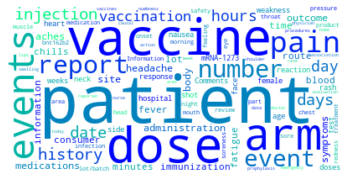

In [13]:
# Create word cloud
wordcloud = WordCloud(background_color="white", max_words=100, colormap="winter")
wordcloud.generate_from_frequencies(frequencies=dct)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloudsymptoms.png')
plt.show()